In [1]:
# My custom library of photoelastic tools
import sys
sys.path.append('/eno/jdfeathe/pepe/')
sys.path.append('/home/jack/workspaces/jupyter-workspace/pepe/')

from pepe.preprocess import crossMask, checkImageType, rectMask, mergeMasks, circularMask
from pepe.simulate import genSyntheticResponse
from pepe.analysis import initialForceSolve, forceOptimize
from pepe.tracking import convCircle

import numpy as np

import cv2

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

In [16]:
dataFolder = '/eno/jdfeathe/DATA/SpaceJam/'
dataset = '2022-05-18_100_MHH_Gap5_1'
fileName = 'frame0352.bmp'

maskFolder = '/eno/jdfeathe/SpaceJam/masks/'

image = checkImageType(dataFolder + dataset + '/' + fileName)

maskArr = checkImageType(f'{maskFolder}{dataset.split("_")[0]}_FullMask.bmp')

circleTrackingKwargs = {"intensitySoftmax": 2., "intensitySoftmin": 1.8, "peakDownsample": 5,
                        "offscreenParticles": False, "radiusTolerance": None, "negativeHalo": True,
                        "fitPeaks": False, "allowOverlap": True, "kernelBlurKernel": 3}

radius = 160

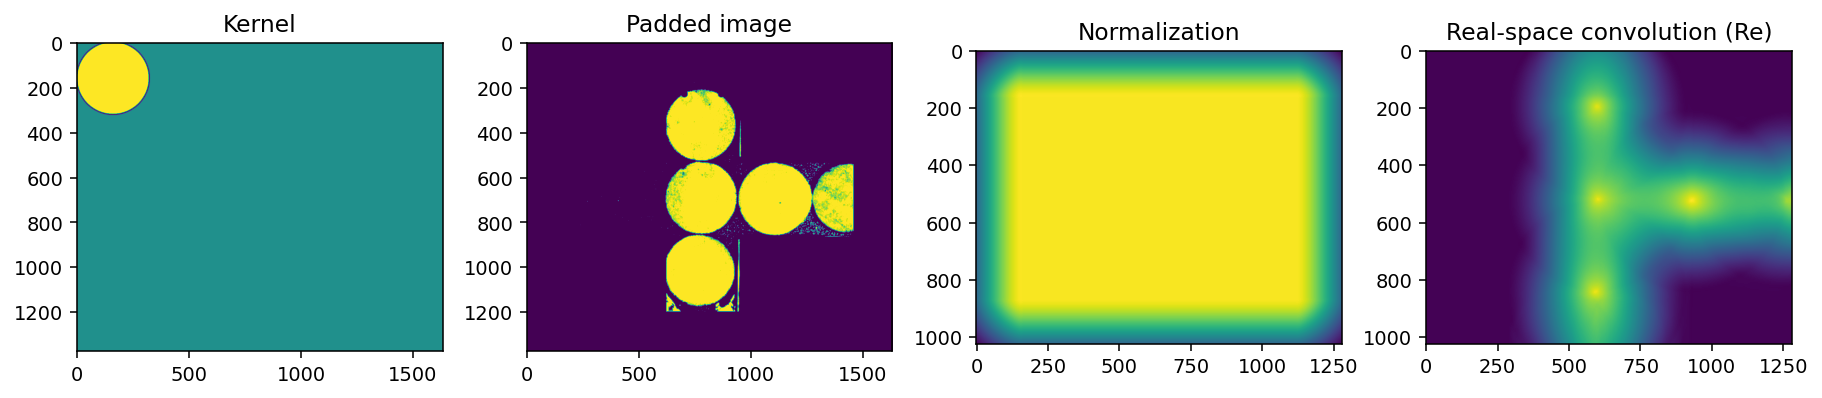

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 183
    # data points      = 1
    # variables        = 2
    chi-square         = 1.1676e+08
    reduced chi-square = 1.1676e+08
    Akaike info crit   = 22.5756707
    Bayesian info crit = 18.5756707
##  Warning: uncertainties could not be estimated:
[[Variables]]
    y:  522.362879 (init = 520)
    x:  927.373464 (init = 925)
    r:  160 (fixed)


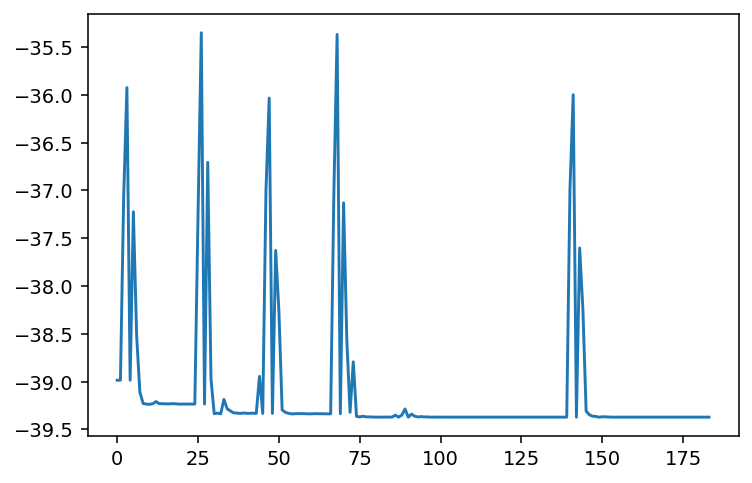

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 146
    # data points      = 1
    # variables        = 2
    chi-square         = 1.1437e+08
    reduced chi-square = 1.1437e+08
    Akaike info crit   = 22.5549899
    Bayesian info crit = 18.5549899
##  Warning: uncertainties could not be estimated:
[[Variables]]
    y:  517.470426 (init = 515)
    x:  601.161384 (init = 600)
    r:  160 (fixed)


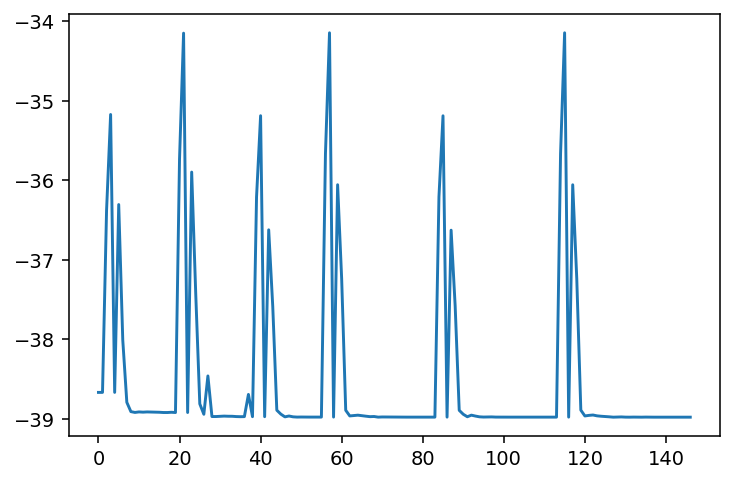

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 158
    # data points      = 1
    # variables        = 2
    chi-square         = 1.1179e+08
    reduced chi-square = 1.1179e+08
    Akaike info crit   = 22.5321556
    Bayesian info crit = 18.5321556
##  Warning: uncertainties could not be estimated:
[[Variables]]
    y:  841.275904 (init = 840)
    x:  591.535023 (init = 590)
    r:  160 (fixed)


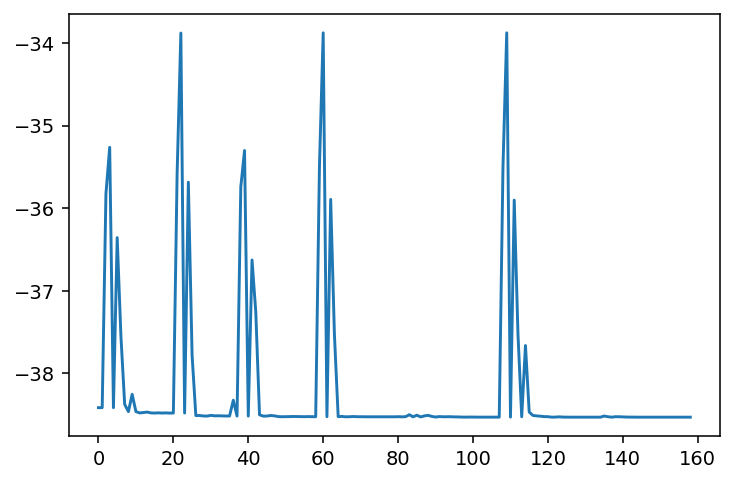

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 110
    # data points      = 1
    # variables        = 2
    chi-square         = 1.0955e+08
    reduced chi-square = 1.0955e+08
    Akaike info crit   = 22.5119321
    Bayesian info crit = 18.5119321
##  Warning: uncertainties could not be estimated:
[[Variables]]
    y:  192.997418 (init = 190)
    x:  597.997434 (init = 595)
    r:  160 (fixed)


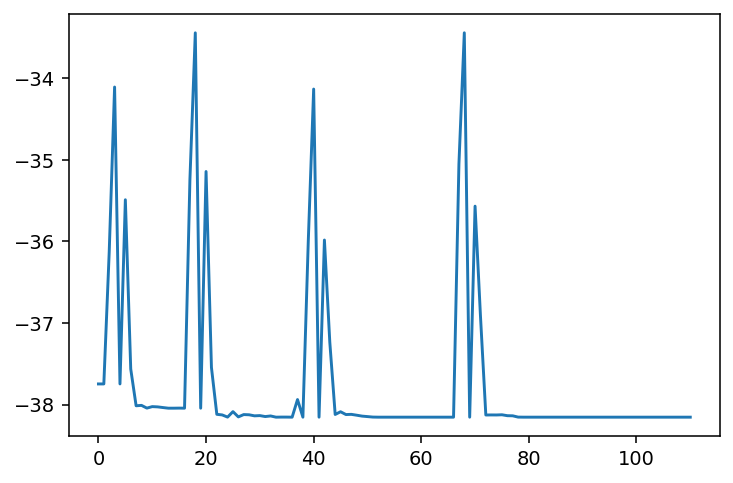

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 158
    # data points      = 1
    # variables        = 2
    chi-square         = 55908792.7
    reduced chi-square = 55908792.7
    Akaike info crit   = 21.8392322
    Bayesian info crit = 17.8392322
##  Warning: uncertainties could not be estimated:
[[Variables]]
    y:  521.267446 (init = 520)
    x:  1259.55514 (init = 1275)
    r:  160 (fixed)


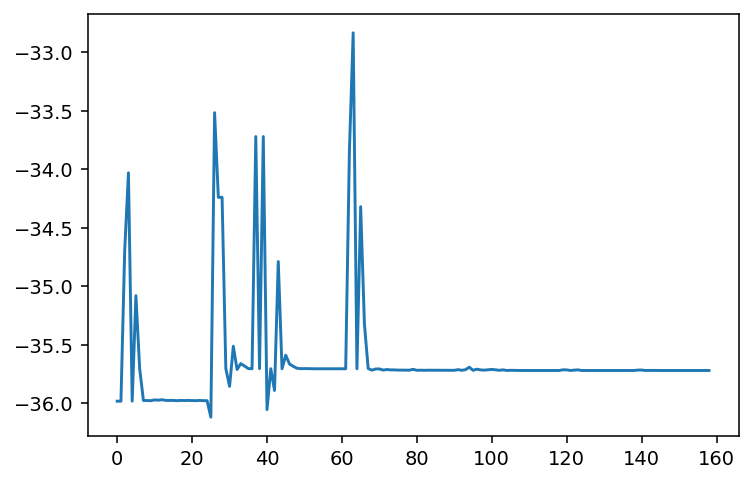

[[ 522.36287916  927.37346439]
 [ 517.47042567  601.16138425]
 [ 841.27590447  591.53502287]
 [ 192.99741834  597.99743414]
 [ 521.26744614 1259.55513988]]


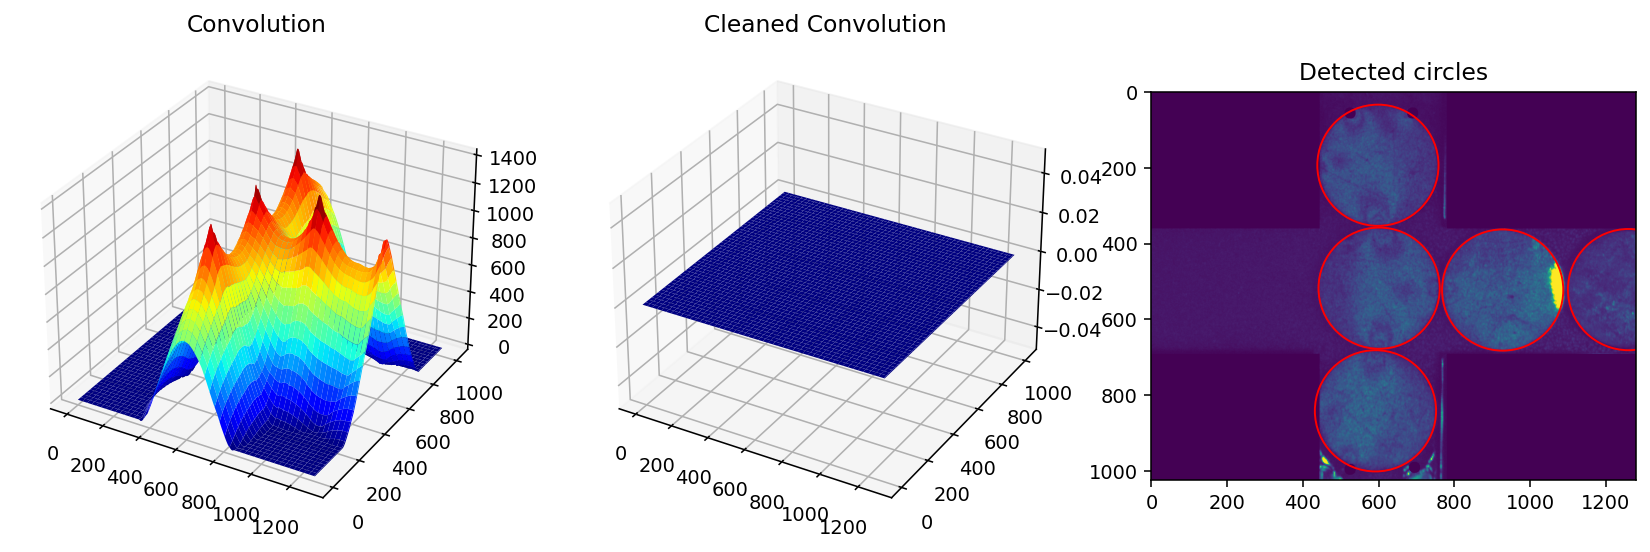

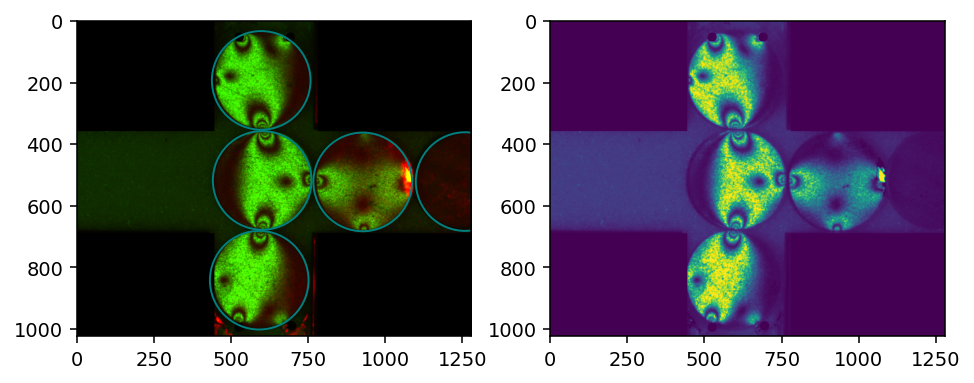

In [17]:

# g2 to force conversion is calibrated on the scale [0, 1], not [0, 255]
# We also blur the images a little, since they are visibly grainy
photoelasticChannel = cv2.blur(image[:,:,1].astype(np.float64) / 255, (3,3))


centers, radii = convCircle(image[:,:,0] * maskArr[:,:,0], radius, **circleTrackingKwargs, debug=True)

#centers = centers.astype(np.int64)
#radii = radii.astype(np.int64)

# A particle is about 1cm across
pxPerMeter = 2*np.mean(radii) / .015
# No idea what the actual value for this is
fSigma = 140

# Make some fake data with several potential wall contacts
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(maskArr * image)
for i in range(len(centers)):
    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particles', color='teal', fill=False, linewidth=1)
    ax[0].add_artist(c)

print(centers)
    
ax[1].imshow(photoelasticChannel * maskArr[:,:,0])
plt.show()

In [ ]:
[[ 522.17176269  929.73197906]
 [ 517.3989014   601.97035438]
 [ 840.99758923  592.00049264]
 [ 192.99992765  597.66421486]
 [ 522.00085837 1261.88417836]]

[[ 522.30521237  929.32089571]
 [ 517.29383455  601.25142794]
 [ 840.99996426  592.00041627]
 [ 193.30420172  597.9999228 ]
 [ 522.0094224  1261.86348882]]

[[ 522.68571296  927.30152497]
 [ 517.44344036  601.2772391 ]
 [ 841.29808301  591.52107297]
 [ 193.00183274  598.99866654]
 [ 522.49681264 1259.79442421]]

[[ 522.36287916  927.37346439]
 [ 517.47042567  601.16138425]
 [ 841.27590447  591.53502287]
 [ 192.99741834  597.99743414]
 [ 521.26744614 1259.55513988]]



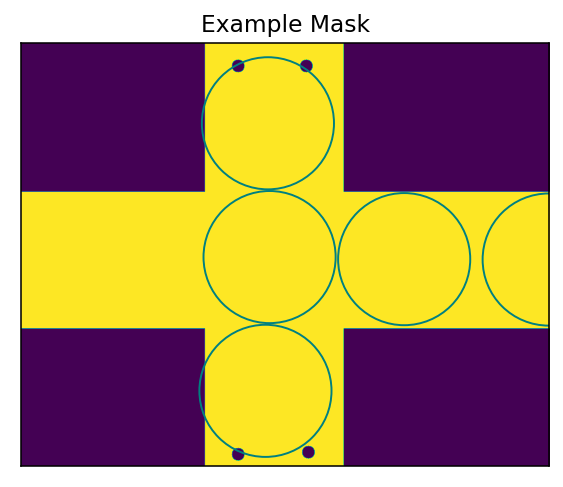

In [24]:
fig, ax = plt.subplots()

ax.imshow(maskArr[:,:,0])
ax.set_xticks([])
ax.set_yticks([])

for i in range(len(centers)):
    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particles', color='teal', fill=False, linewidth=1)
    ax.add_artist(c)


ax.set_title('Example Mask')
#ax.colorbar()
#plt.savefig('../images/example_uses/example_mask.png')
plt.show()

## Find initial guess

In [25]:
# Parameters of our force solving method
contactPadding = 30
g2MaskPadding = 3
contactMaskRadius = 30
brightfield = False

forceGuessArr, alphaGuessArr, betaGuessArr = initialForceSolve(photoelasticChannel,
                                                centers, radii, fSigma, pxPerMeter,
                                                contactPadding, g2MaskPadding,
                                                contactMaskRadius=contactMaskRadius,
                                                boundaryMask=maskArr, ignoreBoundary=False)

#forceGuessArr /= np.max([np.max(f) for f in forceGuessArr])

## Show initial guess

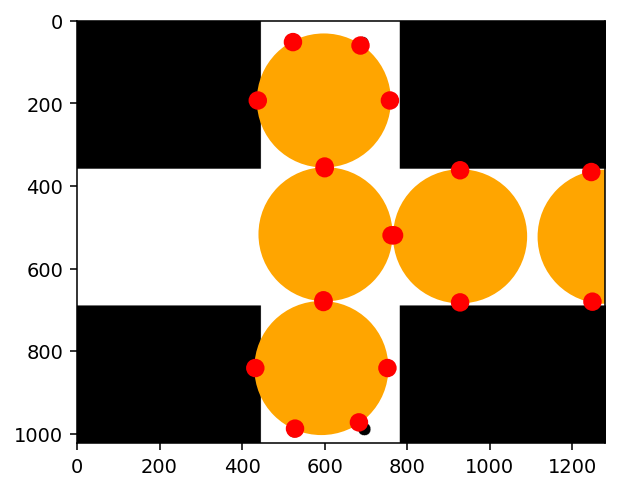

In [26]:
# Draw on all of the found contacts
fig, ax = plt.subplots()

ax.imshow(maskArr*255)

for i in range(len(centers)):
    # particle itself
    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particle', color='orange')
    ax.add_artist(c)
    
    # Now add contacts
    for j in range(len(betaGuessArr[i])):
        contactPoint = centers[i] + radii[i] * np.array([np.cos(betaGuessArr[i][j]), np.sin(betaGuessArr[i][j])])
        #linePoints = np.array([centers[i], radii[i] * np.array([np.cos(betaGuessArr[i][j]), np.sin(betaGuessArr[i][j])])])
        #plt.plot(linePoints[0], linePoints[1], color='blue')
        cc = plt.Circle(contactPoint[::-1], 20, color='red')
        ax.add_artist(cc)
        
plt.show()

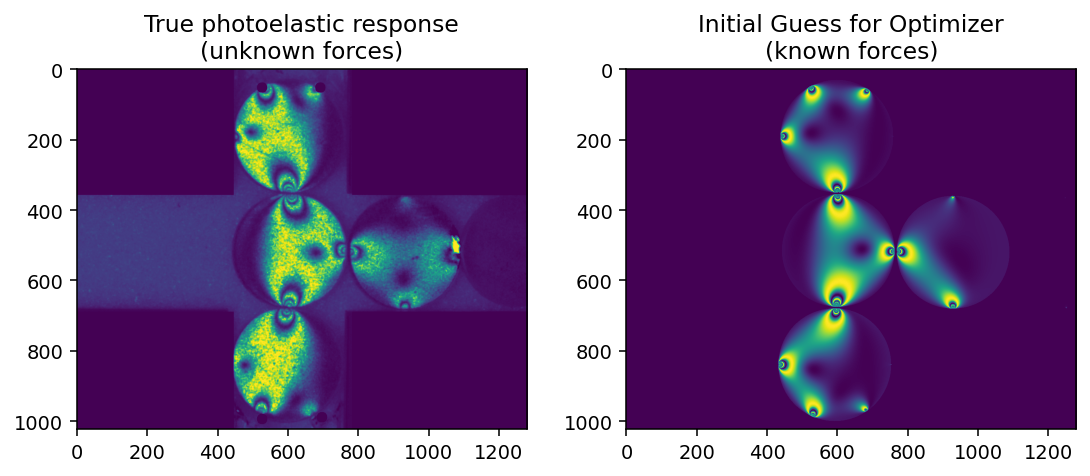

Absolute error (entire system): -99429.60992199116


In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(photoelasticChannel * maskArr[:,:,0])
ax[0].set_title('True photoelastic response\n(unknown forces)')

estimatedPhotoelasticChannel = np.zeros_like(photoelasticChannel, dtype=np.float64)

for i in range(len(centers)):
    estimatedPhotoelasticChannel += genSyntheticResponse(np.array(forceGuessArr[i]),
                                                         np.array(alphaGuessArr[i]),
                                                         np.array(betaGuessArr[i]),
                                                         fSigma, radii[i],
                                                         pxPerMeter, brightfield, imageSize=photoelasticChannel.shape,
                                                         center=centers[i])


ax[1].imshow(estimatedPhotoelasticChannel)
ax[1].set_title('Initial Guess for Optimizer\n(known forces)')

fig.tight_layout()
plt.show()

print(f'Absolute error (entire system): {np.sum(estimatedPhotoelasticChannel - photoelasticChannel)}')

## Optimize forces

Removed 2 force(s).
Removed 2 force(s).
Removed 1 force(s).
Removed 2 force(s).


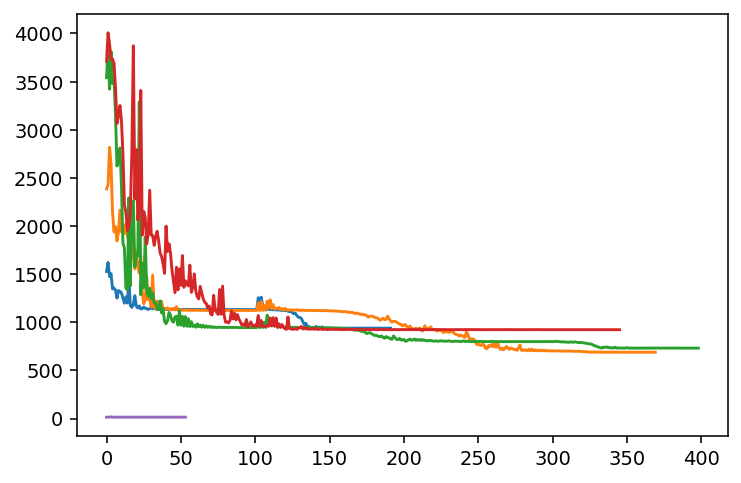

In [28]:
# Now optimize each particle's forces
optimizedForceArr = []
optimizedBetaArr = []
optimizedAlphaArr = []
resArr = []

optimizationKwargs = {"maxEvals": [100, 200, 100], "method": 'nelder',
                      "parametersToFit": [['f'], ['f', 'a'], ['a']],
                      "allowRemoveForces": True, "useTolerance": False,
                      "allowAddForces": True, "minForceThreshold": .01,
                      "localizeAlphaOptimization": False, "imageScaleFactor": .5,
                      "forceBalanceWeighting": .05}

for i in range(len(centers)):
    optForceArr, optBetaArr, optAlphaArr, res = forceOptimize(forceGuessArr[i], betaGuessArr[i], alphaGuessArr[i],
                                                              radii[i], centers[i], photoelasticChannel, fSigma, pxPerMeter, brightfield,
                                                              **optimizationKwargs, debug=True)
    optimizedForceArr.append(optForceArr)
    optimizedBetaArr.append(optBetaArr)
    optimizedAlphaArr.append(optAlphaArr)
    resArr.append(res)

for res in resArr:
    plt.plot(res)

plt.show()

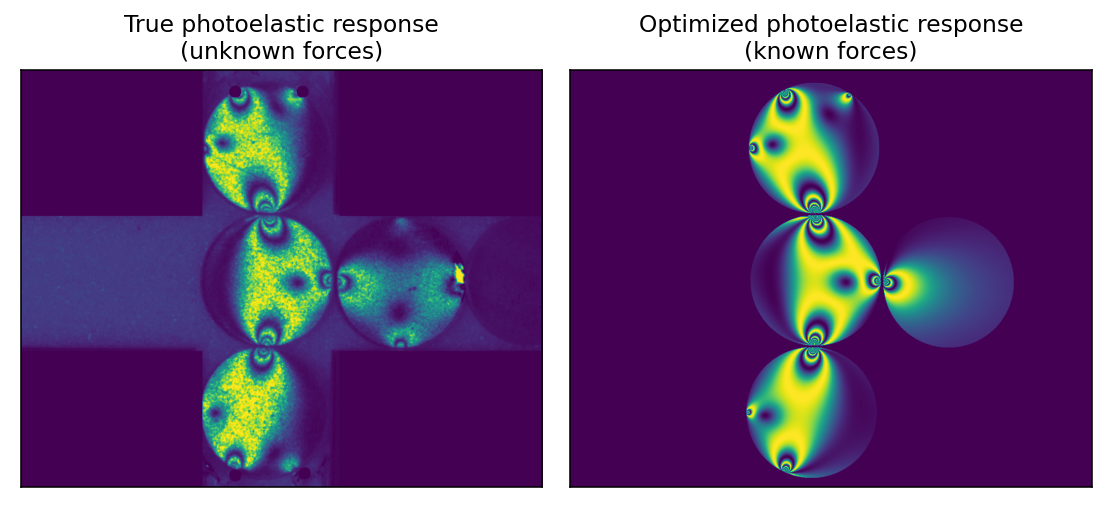

Absolute error (entire system): -43850.692890262464


In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(photoelasticChannel * maskArr[:,:,0])
ax[0].set_title('True photoelastic response\n(unknown forces)')
ax[0].set_xticks([])
ax[0].set_yticks([])

optimizedPhotoelasticChannel = np.zeros(photoelasticChannel.shape)

for i in range(len(centers)):
    optimizedPhotoelasticChannel += genSyntheticResponse(np.array(optimizedForceArr[i]),
                                                         np.array(optimizedAlphaArr[i]),
                                                         np.array(optimizedBetaArr[i]),
                                                         fSigma, radii[i], pxPerMeter, brightfield,
                                                         imageSize=photoelasticChannel.shape, center=centers[i])


ax[1].imshow(optimizedPhotoelasticChannel)
ax[1].set_title('Optimized photoelastic response\n(known forces)')
ax[1].set_xticks([])
ax[1].set_yticks([])

fig.tight_layout()
#plt.savefig('../images/example_uses/space_jam_test.png')
plt.show()

print(f'Absolute error (entire system): {np.sum(optimizedPhotoelasticChannel - photoelasticChannel)}')

In [16]:
optimizedForceArr

[array([0.14489717]),
 array([0.1240253 , 0.09132256, 0.12397449]),
 array([0.11369005, 0.11547726, 0.05191486]),
 array([0.14555599, 0.02310561, 0.09234012, 0.07056692])]

In [15]:
optimizedAlphaArr

[array([0.1]),
 array([9.85828127e-02, 9.99098450e-02, 9.80750615e-08]),
 array([0.03014407, 0.00349687, 0.08064952]),
 array([0.00011762, 0.09193884, 0.09952264, 0.09298437])]